In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from google.colab import files
import pickle
import os
from scipy import stats
from scipy.stats import zscore

!pip install missingno
import missingno as msno

!pip install fancyimpute
import fancyimpute

!pip install --upgrade autoviz
from autoviz.AutoViz_Class import AutoViz_Class

warnings.filterwarnings("ignore")
%matplotlib inline

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=21a939b5a65631628c7abf9b41ec574615b98d830468c7c91d2154c47cf852d9
  Stored in directory: /root/.cache/pip/wheels/df/20/91/e4850b9a31cf660c1bc95515d3bcbc8010e869e5de6d5baf07
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11331 sha256=4784e714ac0f62adf94ba42a56eaee5a5fe7f1d4107ccf8a0ab1537f70f34358
  Stored in directory: /root/.cache/pip/wheels/89/11/61/aa5a3167bfff49218cd043a73a83034b9eadd858b0059521be
Successfully built fancyimpute knnimpute
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
BG_BLACK = "\033[40m"
BG_RED = "\033[41m"
BG_GREEN = "\033[42m"
BG_YELLOW = "\033[43m"
BG_BLUE = "\033[44m"
BG_MAGENTA = "\033[45m"
BG_CYAN = "\033[46m"
BG_WHITE = "\033[47m"
BG_DARK_GRAY = "\033[100m"
BG_BRIGHT_RED = "\033[101m"
BG_BRIGHT_GREEN = "\033[102m"
BG_BRIGHT_YELLOW = "\033[103m"
BG_BRIGHT_BLUE = "\033[104m"
BG_BRIGHT_MAGENTA = "\033[105m"
BG_BRIGHT_CYAN = "\033[106m"
BG_WHITE = "\033[107m"
RESET = "\033[0m" # Reset all formatting

In [102]:
np.random.seed(31071967)

In [103]:
download_pickels = True

In [104]:
import os, pathlib, sys
!mkdir -p pickles
pickle_file = '/content/pickles/load_default_datacleansing_clean.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df = pd.read_pickle(pickle_file)

df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d
1,545583,2500.0,2500.0,2500.0,36 months,13.98,85.0,4.0,RENT,9.903738,Not Verified,other,MI,19.86,0.0,5.0,7.0,0.0,6.889591,21.30,10.0,8.031385,8.031385,2500.0,6.356108,4.521789,0,2010.0,7.0,2005.0,8.0,2013.0,7.0,2016.0,6.0,2010-07-01
2,532101,5000.0,5000.0,5000.0,36 months,15.95,176.0,4.0,RENT,10.985310,Not Verified,debt_consolidation,NY,19.57,0.0,1.0,7.0,0.0,9.840228,99.90,15.0,7.989560,7.989560,1909.0,6.774224,5.176150,1,2010.0,6.0,1994.0,4.0,2011.0,11.0,2012.0,3.0,2010-06-01
3,877788,7000.0,7000.0,7000.0,36 months,9.91,226.0,10.0,MORTGAGE,10.892973,Not Verified,other,TX,10.80,3.0,3.0,7.0,0.0,8.092545,47.20,20.0,8.997518,8.997518,7000.0,6.987490,7.346655,0,2011.0,9.0,1998.0,3.0,2014.0,3.0,2014.0,3.0,2011-09-01
4,875406,2000.0,2000.0,2000.0,36 months,5.42,60.0,10.0,RENT,10.308986,Not Verified,debt_consolidation,NY,3.60,0.0,0.0,7.0,0.0,7.547643,0.00,15.0,7.679251,7.679251,2000.0,5.093750,3.988984,0,2011.0,9.0,1975.0,1.0,2014.0,2.0,2016.0,6.0,2011-09-01
5,506439,3600.0,3600.0,3600.0,36 months,10.25,117.0,10.0,MORTGAGE,10.890218,Not Verified,other,AL,1.55,0.0,4.0,8.0,0.0,7.278170,0.00,25.0,8.344505,8.344505,3600.0,6.408529,4.997212,0,2010.0,4.0,1998.0,4.0,2013.0,5.0,2016.0,6.0,2010-04-01
6,981465,8000.0,8000.0,8000.0,36 months,6.03,243.0,10.0,MORTGAGE,11.261087,Verified,other,AZ,6.07,0.0,0.0,12.0,0.0,8.338784,13.60,49.0,9.074062,9.074062,8000.0,6.587550,7.261927,0,2011.0,10.0,1996.0,7.0,2014.0,4.0,2014.0,4.0,2011-10-01
7,749050,6000.0,6000.0,6000.0,36 months,7.49,187.0,3.0,RENT,10.463132,Not Verified,debt_consolidation,MO,13.13,0.0,0.0,5.0,0.0,8.676758,47.70,9.0,8.812695,8.812695,6000.0,6.577861,5.356586,0,2011.0,5.0,2003.0,10.0,2014.0,5.0,2014.0,5.0,2011-05-01
8,1016373,25600.0,25600.0,25473.0,60 months,14.27,599.0,4.0,RENT,11.362114,Verified,debt_consolidation,NY,26.51,0.0,1.0,16.0,0.0,10.404929,70.80,32.0,10.399433,10.393906,25600.0,8.887515,9.685642,0,2011.0,11.0,1983.0,10.0,2014.0,4.0,2016.0,6.0,2011-11-01
9,786870,19750.0,19750.0,19750.0,60 months,23.22,559.0,10.0,MORTGAGE,11.191356,Verified,debt_consolidation,MO,19.96,0.0,0.0,15.0,0.0,9.977899,98.70,44.0,10.223613,10.223613,19750.0,8.961366,9.633318,0,2011.0,6.0,1992.0,3.0,2013.0,6.0,2016.0,2.0,2011-06-01
10,1019261,6250.0,6250.0,6250.0,36 months,17.27,224.0,4.0,MORTGAGE,10.239996,Verified,other,OH,13.76,0.0,0.0,2.0,1.0,6.405507,8.46,15.0,8.808369,8.808369,4764.0,7.446585,5.416100,1,2011.0,11.0,1999.0,10.0,2014.0,4.0,2014.0,9.0,2011-11-01


In [105]:
pickle_file = '/content/pickles/drop_earliest_cr_line.pkl'

if not os.path.exists(pickle_file):
# Upload file
  uploaded = files.upload()

# Read pickle into DataFrame
df_date = pd.read_pickle(pickle_file)

df_date.head(100)

,id,earliest_cr_line,repay_fail
1,545583,2005-08-01,0
2,532101,1994-04-01,1
3,877788,1998-03-01,0
4,875406,1975-01-01,0
5,506439,1998-04-01,0
6,981465,1996-07-01,0
7,749050,2003-10-01,0
8,1016373,1983-10-01,0
9,786870,1992-03-01,0
10,1019261,1999-10-01,1


In [106]:
df_orig = df.copy()

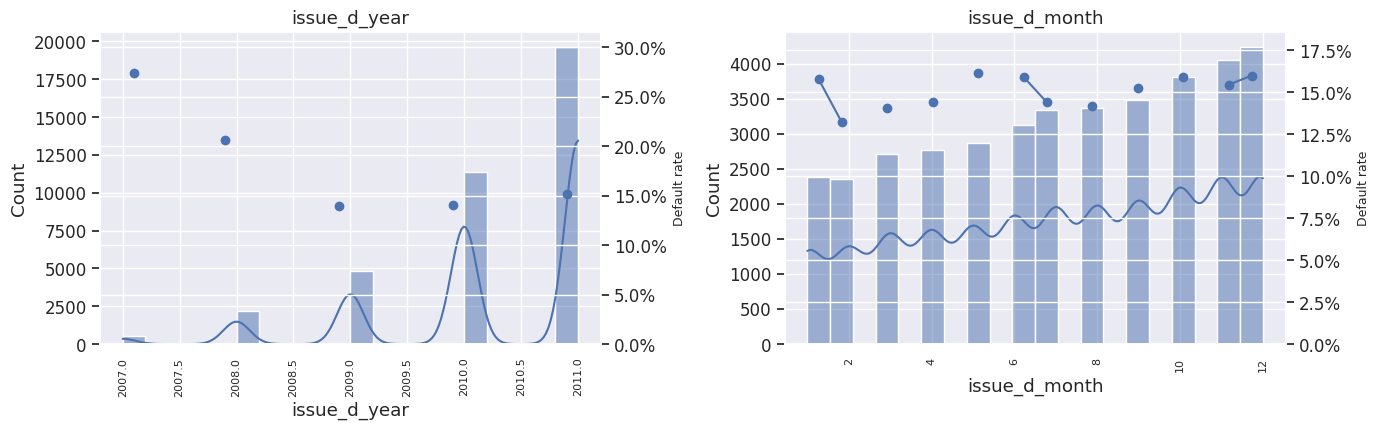

In [108]:
import pandas as pd
import numpy as np
import math, numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
date_cols = ['issue_d_year','issue_d_month'] #,'months_between_earliest_to_issue','months_between_las_p_to_issue']

plot_cols = 3
plot_rows = math.ceil(len(date_cols) / plot_cols)
bins_num = 20  # אפשר לשנות לפי הצורך

sns.set(font_scale=1.1)
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(20, 4.5*plot_rows))
axes = np.array(axes).reshape(plot_rows, plot_cols)

for i, col in enumerate(date_cols):
    r, c = divmod(i, plot_cols)
    ax = axes[r, c]

    # נתונים נומריים לעמודה (ממיר לטובת plotting; NaN נשמר)
    x = pd.to_numeric(df[col], errors='coerce')

    # אם אין מספיק נתונים — דלגי בנימוס
    if x.dropna().shape[0] < 5:
        ax.text(0.5, 0.5, "לא מספיק נתונים", ha='center', va='center', transform=ax.transAxes)
        ax.set_title(col); ax.set_xticks([]); ax.set_yticks([])
        continue

    # קביעת גבולות היסטוגרמה (כדי להשתמש באותם BINS גם לאחוז הכשל)
    bin_edges = np.histogram_bin_edges(x.dropna(), bins=bins_num)

    # היסטוגרמה + KDE
    sns.histplot(x=x, bins=bin_edges, kde=True, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)

    # חישוב אחוז כשל לכל BIN
    cats = pd.cut(x, bins=bin_edges, include_lowest=True)
    # מניחים ש-repay_fail הוא 0/1 כפי שציינת
    fail_rate = df['repay_fail'].groupby(cats).mean()

    # מרכזי ה-BINs לקו
    centers = np.array([(iv.left + iv.right) / 2 for iv in fail_rate.index])

    # קו אחוז כשל על ציר Y משני
    ax2 = ax.twinx()
    ax2.plot(centers, fail_rate.values, marker='o', linewidth=1.5)
    ax2.set_ylim(0, max(0.01, np.nanmax(fail_rate.values) * 1.15))
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax2.set_ylabel('Default rate', fontsize=9)

# העלמת צירים ריקים (אם מספר המשבצות גדול ממספר העמודות)
for j in range(i+1, plot_rows*plot_cols):
    r, c = divmod(j, plot_cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

In [110]:
df.head(1000)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d
1,545583,2500.0,2500.0,2500.0,36 months,13.98,85.0,4.0,RENT,9.903738,Not Verified,other,MI,19.86,0.0,5.0,7.0,0.0,6.889591,21.30,10.0,8.031385,8.031385,2500.0,6.356108,4.521789,0,2010.0,7.0,2005.0,8.0,2013.0,7.0,2016.0,6.0,2010-07-01
2,532101,5000.0,5000.0,5000.0,36 months,15.95,176.0,4.0,RENT,10.985310,Not Verified,debt_consolidation,NY,19.57,0.0,1.0,7.0,0.0,9.840228,99.90,15.0,7.989560,7.989560,1909.0,6.774224,5.176150,1,2010.0,6.0,1994.0,4.0,2011.0,11.0,2012.0,3.0,2010-06-01
3,877788,7000.0,7000.0,7000.0,36 months,9.91,226.0,10.0,MORTGAGE,10.892973,Not Verified,other,TX,10.80,3.0,3.0,7.0,0.0,8.092545,47.20,20.0,8.997518,8.997518,7000.0,6.987490,7.346655,0,2011.0,9.0,1998.0,3.0,2014.0,3.0,2014.0,3.0,2011-09-01
4,875406,2000.0,2000.0,2000.0,36 months,5.42,60.0,10.0,RENT,10.308986,Not Verified,debt_consolidation,NY,3.60,0.0,0.0,7.0,0.0,7.547643,0.00,15.0,7.679251,7.679251,2000.0,5.093750,3.988984,0,2011.0,9.0,1975.0,1.0,2014.0,2.0,2016.0,6.0,2011-09-01
5,506439,3600.0,3600.0,3600.0,36 months,10.25,117.0,10.0,MORTGAGE,10.890218,Not Verified,other,AL,1.55,0.0,4.0,8.0,0.0,7.278170,0.00,25.0,8.344505,8.344505,3600.0,6.408529,4.997212,0,2010.0,4.0,1998.0,4.0,2013.0,5.0,2016.0,6.0,2010-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,716110,30000.0,30000.0,30000.0,60 months,16.40,736.0,2.0,MORTGAGE,12.055302,Source Verified,debt_consolidation,CA,9.57,0.0,2.0,4.0,0.0,10.497284,7.64,27.0,9.090092,9.090092,3460.0,8.264878,6.602588,1,2011.0,4.0,1997.0,12.0,2012.0,2.0,2012.0,7.0,2011-04-01
998,472163,15250.0,15250.0,14660.0,36 months,12.53,510.0,1.0,MORTGAGE,10.422311,Not Verified,debt_consolidation,NY,19.21,1.0,1.0,16.0,0.0,8.941938,41.90,26.0,9.806040,9.763536,15250.0,7.970049,8.496786,0,2010.0,1.0,1999.0,8.0,2012.0,4.0,2012.0,4.0,2010-01-01
999,653426,16750.0,16750.0,16725.0,60 months,19.74,441.0,5.0,RENT,10.778977,Verified,debt_consolidation,GA,19.65,0.0,1.0,11.0,0.0,9.469469,55.80,18.0,10.183918,10.182444,16750.0,9.182352,7.497762,0,2011.0,1.0,2005.0,7.0,2015.0,10.0,2016.0,6.0,2011-01-01
1000,845321,11000.0,11000.0,11000.0,36 months,16.89,392.0,7.0,MORTGAGE,10.819798,Source Verified,major_purchase,MI,15.31,1.0,0.0,7.0,0.0,9.378648,85.10,17.0,9.553788,9.553788,11000.0,8.038512,6.035481,0,2011.0,8.0,2001.0,6.0,2014.0,8.0,2014.0,8.0,2011-08-01


In [111]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,issue_d
count,3.847800e+04,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478
mean,6.650325e+05,10775.232331,10561.343466,9958.935603,12.094207,316.301888,10.959315,13.412862,0.144479,0.988365,9.260761,0.055394,8.952721,49.302842,21.844440,9.094785,9.002639,9441.325119,7.178182,6.601578,0.151463,2010.233042,7.131816,1996.584100,6.878424,2012.703623,6.467462,2014.240995,6.148345,2010-09-28 18:00:10.104475136
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,16.000000,9.126198,0.000000,0.000000,0.000000,1.000000,0.000000,5.187386,0.000000,1.000000,6.327937,5.552756,0.000000,3.465736,0.000000,0.000000,2007.000000,1.000000,1946.000000,1.000000,2007.000000,1.000000,2007.000000,1.000000,2007-06-01 00:00:00
25%,4.983722e+05,5581.250000,5500.000000,5000.000000,9.640000,170.000000,10.635879,8.640000,0.000000,0.000000,6.000000,0.000000,8.317583,27.700000,14.000000,8.641356,8.524764,4800.000000,6.511745,5.424950,0.000000,2010.000000,4.000000,1993.000000,4.000000,2012.000000,3.000000,2013.000000,4.000000,2010-04-01 00:00:00
50%,6.443430e+05,10000.000000,10000.000000,8896.832513,11.990000,287.000000,10.968216,13.460787,0.000000,1.000000,9.000000,0.000000,9.076580,49.600000,20.841455,9.151439,9.078750,8289.657984,7.183871,6.327937,0.000000,2011.000000,7.000000,1998.000000,7.000000,2013.000000,6.000000,2015.000000,6.000000,2011-01-01 00:00:00
75%,8.265722e+05,15000.000000,14400.000000,13700.000000,14.460000,409.000000,11.289794,18.400000,0.000000,1.718950,12.000000,0.000000,9.712176,71.400000,28.000000,9.662912,9.615005,12760.000000,7.897204,8.011355,0.000000,2011.000000,10.000000,2001.000000,10.000000,2014.000000,9.000000,2016.000000,8.000000,2011-08-01 00:00:00
max,1.077430e+06,34000.000000,33250.000000,32102.222035,24.110000,950.046055,12.821261,29.990000,7.000000,6.000000,24.000000,3.000000,12.904063,119.000000,61.000000,10.977893,10.977893,28788.852084,10.069510,10.474382,1.000000,2011.000000,12.000000,2008.000000,12.000000,2016.000000,12.000000,2016.000000,12.000000,2011-12-01 00:00:00
std,2.191854e+05,6617.557035,6424.639684,6414.885975,3.583168,188.955215,0.519106,6.493189,0.469881,1.188176,4.118549,0.230515,1.139969,27.368691,10.824692,0.794556,0.858806,6290.233440,1.045095,1.700867,0.358504,0.962635,3.416248,6.832742,3.536742,1.610677,3.423837,1.864642,2.936946,NaN


In [49]:
df['loan_amnt']       = pd.to_numeric(df['loan_amnt'], errors='coerce').round().astype('Int64')
df['funded_amnt']     = pd.to_numeric(df['funded_amnt'], errors='coerce').round().astype('Int64')
df['funded_amnt_inv'] = pd.to_numeric(df['funded_amnt_inv'], errors='coerce').round().astype('Int64')
loan_amnt        = pd.to_numeric(df['loan_amnt'], errors='coerce')
funded_amnt      = pd.to_numeric(df['funded_amnt'], errors='coerce')
funded_amnt_inv  = pd.to_numeric(df['funded_amnt_inv'], errors='coerce')


# # עמודות חדשות
# df['platform_share'] = funded_amnt - funded_amnt_inv          # כמה מומן לא ע"י משקיעים (פלטפורמה)
# df['underfunded']    = loan_amnt - funded_amnt                # כמה לא גויס ביחס לסכום ההלוואה


# gap_platform = funded_amnt - funded_amnt_inv   # חלק שמומן לא ע"י משקיעים
# gap_under    = loan_amnt   - funded_amnt       # פער מימון לעומת סכום ההלוואה

# #df['platform_share_1'] = np.where(gap_platform > 100, gap_platform, 0)
# #df['underfunded_1']    = np.where(gap_under    > 100, gap_under,    0)

# # אופציונלי: המרה לשלם (אם אין צורך בשברים)


# # אופציונלי: להבטיח שאין ערכים שליליים (במקרה של רעש/עיגול)
# df[['platform_share', 'underfunded']] = df[['platform_share', 'underfunded']].clip(lower=0)

# # בדיקה קצרה
# print(df[['loan_amnt','funded_amnt','funded_amnt_inv','platform_share','underfunded']].head(50))

In [ ]:
# # כמה פעמים שלושתם שווים
# eq_all = (df['loan_amnt'] == df['funded_amnt']) & (df['funded_amnt'] == df['funded_amnt_inv'])
# print("all equal:", eq_all.sum())
# print("all equal:", eq_all.mean())
# # האם יש פער בין funded_amnt ל-loan_amnt
# print("funded < loan:", (df['funded_amnt'] < df['loan_amnt']).sum())

# # האם יש חלק שמומן לא ע\"י משקיעים (פלטפורמה)
# gap = df['funded_amnt'] - df['funded_amnt_inv']
# print("platform-funded (>0):", (gap > 0).sum())
# print(gap.describe())


In [ ]:
# feature = "platform_share"
# target = "repay_fail"
# plt.figure(figsize=(8,4))
# sns.boxplot(x=target, y=feature, data=df)
# plt.title(f"{feature} vs {target}")
# plt.show()

In [ ]:
# feature = "underfunded"
# target = "repay_fail"
# plt.figure(figsize=(8,4))
# sns.boxplot(x=target, y=feature, data=df)
# plt.title(f"{feature} vs {target}")
# plt.show()


In [ ]:
# # plot values
# cat_cols      = ['term','emp_length','home_ownership','verification_status','purpose','addr_state']
# plot_columns = 3
# plot_rows = (len(cat_cols)//plot_columns) + len(cat_cols)%plot_columns

# fig = plt.figure(figsize=(20,15))
# plt.subplots_adjust(hspace=0.8)
# plt.xticks(rotation=90, ha='center')  # אחרי הקריאה ל-sns.barplot/plt.bar
# plt.tight_layout()
# sns.set(font_scale=1.2)

# for plot_counter, col in enumerate(cat_cols, start=1):
#     plt.subplot(plot_rows, plot_columns, plot_counter)
#     sns.histplot(x=col, data=df, kde=True)

# plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        38478 non-null  int64         
 1   loan_amnt                 38478 non-null  Int64         
 2   funded_amnt               38478 non-null  Int64         
 3   funded_amnt_inv           38478 non-null  Int64         
 4   term                      38478 non-null  category      
 5   int_rate                  38478 non-null  float64       
 6   installment               38478 non-null  float64       
 7   emp_length                38478 non-null  category      
 8   home_ownership            38478 non-null  category      
 9   annual_inc                38478 non-null  float64       
 10  verification_status       38478 non-null  category      
 11  purpose                   38478 non-null  category      
 12  addr_state             

In [11]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        38478 non-null  int64         
 1   loan_amnt                 38478 non-null  float64       
 2   funded_amnt               38478 non-null  float64       
 3   funded_amnt_inv           38478 non-null  float64       
 4   term                      38478 non-null  category      
 5   int_rate                  38478 non-null  float64       
 6   installment               38478 non-null  float64       
 7   emp_length                38478 non-null  category      
 8   home_ownership            38478 non-null  category      
 9   annual_inc                38478 non-null  float64       
 10  verification_status       38478 non-null  category      
 11  purpose                   38478 non-null  category      
 12  addr_state             

Data Improvement Actions

In [50]:
cont_cols_orig      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec']
corr_matrix = df[cont_cols_orig].corr()   #(method='spearman')
corr_matrix


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec
loan_amnt,1.000000,0.985225,0.938397,0.278072,0.933893,0.444891,0.070724,-0.042168,-0.035754,0.187563,0.381622,0.074463,0.259547,0.802944,0.735619,0.856413,0.734861,0.406675,-0.058515
funded_amnt,0.985225,1.000000,0.952753,0.282316,0.955377,0.442518,0.069318,-0.043750,-0.035212,0.184944,0.378248,0.078272,0.254004,0.812212,0.745420,0.870808,0.739567,0.410163,-0.059610
funded_amnt_inv,0.938397,0.952753,1.000000,0.268370,0.891523,0.420567,0.074312,-0.052761,-0.066023,0.167314,0.351720,0.076583,0.246218,0.787190,0.821789,0.844010,0.715434,0.407603,-0.061616
int_rate,0.278072,0.282316,0.268370,1.000000,0.256501,0.063578,0.125461,0.150430,0.171160,-0.000819,0.128179,0.472164,-0.049130,0.197110,0.176925,0.156505,0.505069,0.074574,0.093121
installment,0.933893,0.955377,0.891523,0.256501,1.000000,0.442693,0.057544,-0.029814,-0.020156,0.181533,0.379470,0.102296,0.233712,0.783150,0.701312,0.848024,0.673807,0.386781,-0.053090
annual_inc,0.444891,0.442518,0.420567,0.063578,0.442693,1.000000,-0.077883,0.028353,0.022621,0.313404,0.414078,0.059958,0.433371,0.414951,0.382855,0.422866,0.315520,0.245512,-0.014913
dti,0.070724,0.069318,0.074312,0.125461,0.057544,-0.077883,1.000000,-0.032062,0.022032,0.311708,0.347193,0.284555,0.247556,0.054851,0.059813,0.040860,0.123995,0.012194,0.000017
delinq_2yrs,-0.042168,-0.043750,-0.052761,0.150430,-0.029814,0.028353,-0.032062,1.000000,0.014007,0.010051,-0.099546,-0.043006,0.066695,-0.030321,-0.043410,-0.043632,0.016404,-0.020025,-0.008930
inq_last_6mths,-0.035754,-0.035212,-0.066023,0.171160,-0.020156,0.022621,0.022032,0.014007,1.000000,0.091123,-0.032803,-0.037639,0.092623,-0.071138,-0.103389,-0.071054,-0.005507,-0.015593,0.049246
open_acc,0.187563,0.184944,0.167314,-0.000819,0.181533,0.313404,0.311708,0.010051,0.091123,1.000000,0.397560,-0.074528,0.695242,0.176036,0.152879,0.168460,0.144201,0.091428,0.004528


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38478 entries, 1 to 38479
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        38478 non-null  int64         
 1   loan_amnt                 38478 non-null  Int64         
 2   funded_amnt               38478 non-null  Int64         
 3   funded_amnt_inv           38478 non-null  Int64         
 4   term                      38478 non-null  category      
 5   int_rate                  38478 non-null  float64       
 6   installment               38478 non-null  float64       
 7   emp_length                38478 non-null  category      
 8   home_ownership            38478 non-null  category      
 9   annual_inc                38478 non-null  float64       
 10  verification_status       38478 non-null  category      
 11  purpose                   38478 non-null  category      
 12  addr_state             

In [52]:
def build_dt(year_col, month_col):
    # נבנה מחרוזת 'YYYY-MM-01' רק כששנה וחודש קיימים
    y = df[year_col].astype('Int64')
    m = df[month_col].astype('Int64')
    s = (
        y.astype('string').str.zfill(4) + '-' +
        m.astype('string').str.zfill(2) + '-01'
    )
    # אם חסר שנה/חודש התוצאה תהיה 'NaT'
    s = s.mask(y.isna() | m.isna())
    return pd.to_datetime(s, errors='coerce', format='%Y-%m-%d')

df['last_pymnt_d']      = build_dt('last_pymnt_d_year', 'last_pymnt_d_month')


In [53]:
import pandas as pd

# keep only the needed columns
tmp = df_date[['id', 'earliest_cr_line']].copy()

# ensure one row per id (take the earliest if duplicates)
tmp['earliest_cr_line'] = pd.to_datetime(tmp['earliest_cr_line'], errors='coerce')


# align dtypes for the key
df['id'] = df['id'].astype(df_date['id'].dtype)

# left-merge the single column
df = df.merge(tmp, on='id', how='left')


In [54]:


# ודאי ששדות התאריך הם datetime
df['issue_d']        = pd.to_datetime(df['issue_d'], errors='coerce', format='mixed')
df['last_pymnt_d']   = pd.to_datetime(df['last_pymnt_d'], errors='coerce', format='mixed')

# חישוב חודשים שלמים עם מסכה לחסרים
mask = df['last_pymnt_d'].notna() & df['issue_d'].notna()
months = pd.Series(pd.NA, index=df.index, dtype='Int64')
months[mask] = ((df.loc[mask, 'last_pymnt_d'].dt.year  - df.loc[mask, 'issue_d'].dt.year)  * 12 +
                (df.loc[mask, 'last_pymnt_d'].dt.month - df.loc[mask, 'issue_d'].dt.month)).astype(int)

df['months_between_las_p_to_issue'] = months

# המרות ל-datetime (התאריכים אצלך נראים day-first)
df['issue_d']          = pd.to_datetime(df['issue_d'],          errors='coerce', dayfirst=True)
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce', dayfirst=True)

# תיקון מקרים של שנה דו-ספרתית שזינקה למאה ה-21 (2067/2068 וכו')
mask_fix = (
    df['earliest_cr_line'].notna() &
    df['issue_d'].notna() &
    (df['earliest_cr_line'] > df['issue_d'])
)
df.loc[mask_fix, 'earliest_cr_line'] = df.loc[mask_fix, 'earliest_cr_line'] - pd.DateOffset(years=100)

# חישוב מחדש של החודשים (שלמים)
mask = df['earliest_cr_line'].notna() & df['issue_d'].notna()
months = pd.Series(pd.NA, index=df.index, dtype='Int64')
months[mask] = (
    (df.loc[mask, 'issue_d'].dt.year  - df.loc[mask, 'earliest_cr_line'].dt.year) * 12 +
    (df.loc[mask, 'issue_d'].dt.month - df.loc[mask, 'earliest_cr_line'].dt.month)
).astype(int)
# מספר חודשים בין תאריך לקיחת אשראי ראשונה לתאריך לקיחת הלוואה נכחי
df['months_between_earliest_to_issue'] = months


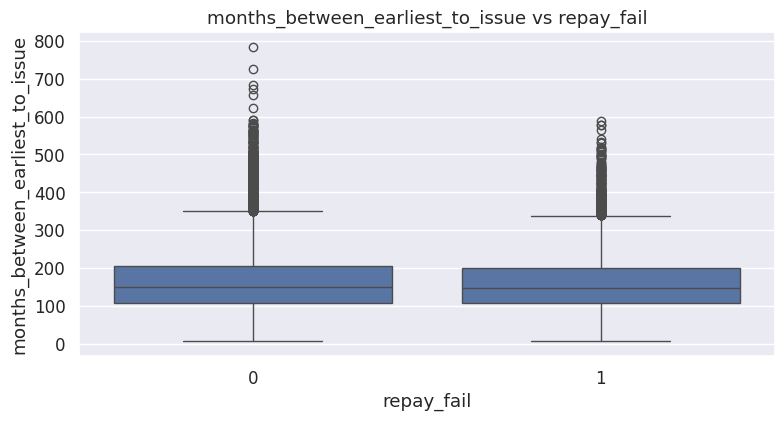

In [55]:
feature = "months_between_earliest_to_issue"
target = "repay_fail"
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y=feature, data=df)
plt.title(f"{feature} vs {target}")
plt.show()

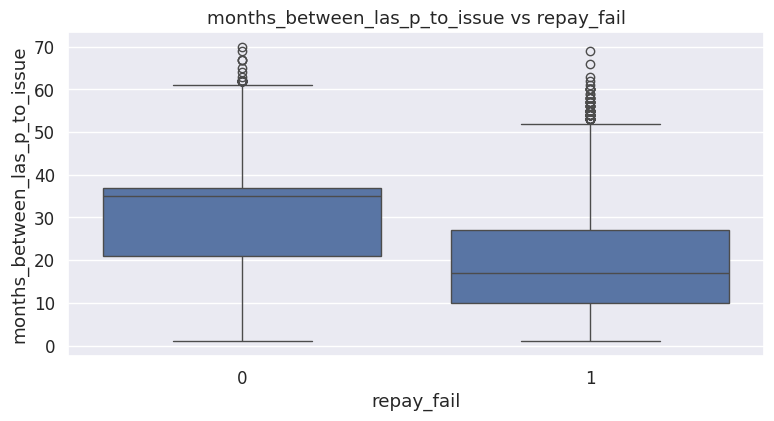

In [18]:
feature = "months_between_las_p_to_issue"
target = "repay_fail"
plt.figure(figsize=(8,4))
sns.boxplot(x=target, y=feature, data=df)
plt.title(f"{feature} vs {target}")
plt.show()

In [56]:
neg_mask = df['months_between_earliest_to_issue'] < 0
print("כמה שליליים:", neg_mask.sum())
cols = ['earliest_cr_line', 'issue_d', 'months_between_earliest_to_issue']
display(df.loc[neg_mask, cols].sort_values('months_between_earliest_to_issue').head(50))

כמה שליליים: 0


,earliest_cr_line,issue_d,months_between_earliest_to_issue


**engineered features**

In [59]:
#Payment-to-Income ratio (PTI) —
df['payment_to_income'] = df['installment'] / (df['annual_inc'] / 12)


In [60]:
#Credit age in months — time between first credit line and loan issue - already calculated
df.rename(columns={'months_between_earliest_to_issue': 'credit_age_months'}, inplace=True)

In [61]:
#Credit stress indicators
df['inq_flag'] = (df['inq_last_6mths'] > 0).astype(int)
df['delinq_flag'] = (df['delinq_2yrs'] > 0).astype(int)

In [62]:

#Funding gap features
df['underfunded_amt']  = df['loan_amnt'] - df['funded_amnt_inv']       # loan not defunded כמה לא גויס ביחס לסכום ההלוואה
df['underfunded_rate'] = df['underfunded_amt'] / df['loan_amnt'].replace(0, np.nan)  #perc from tot loan_amount
df['platform_share_amt'] = df['funded_amnt'] - df['funded_amnt_inv']   # non investors loan amount כמה מומן לא ע"י משקיעים (פלטפורמה)
df['platform_share_rate'] = df['platform_share_amt'] / df['loan_amnt'].replace(0, np.nan) #perc from tot loan amount




In [63]:

# --- 1) Make term_num = 36/60 from 'term' ---
# Extract the digits from strings like "36 months" / "60 month" / "36"
term_digits = (
    df['term']
      .astype(str)
      .str.extract(r'(\d+)', expand=False)
)

df['term_num'] = pd.to_numeric(term_digits, errors='coerce').astype('Int64')

# Keep only {36, 60}; anything else -> NaN (so we don't silently keep bad terms)
df['term_num'] = df['term_num'].where(df['term_num'].isin([36, 60]), pd.NA)

# Optional: quick sanity check
print("term_num unique:", df['term_num'].dropna().unique())

# --- 2) Ensure int_rate is numeric (handles strings like '13.5%' or '13.5') ---
ir = (df['int_rate']
        .astype(str)
        .str.replace('%','', regex=False)
        .str.strip())

ir = pd.to_numeric(ir, errors='coerce')

# If rates look like percentages (e.g., 13.5), convert to fraction (0.135)
if ir.dropna().max() > 1:
    ir = ir / 100.0

df['int_rate'] = ir  # overwrite with cleaned fraction

# --- 3) Compute your features ---
df['amount_x_rate'] = pd.to_numeric(df['loan_amnt'], errors='coerce') * df['int_rate']
df['rate_x_term']   = df['int_rate'] * df['term_num'].astype('float')

# (Optional) Replace infinities with NaN
df[['amount_x_rate','rate_x_term']] = df[['amount_x_rate','rate_x_term']].replace([np.inf, -np.inf], np.nan)


term_num unique: <IntegerArray>
[36, 60]
Length: 2, dtype: Int64


In [64]:
df['revol_util_log'] = np.log1p(df['revol_util'])
df['loan_amnt_log'] = np.log1p(df['loan_amnt'])
df['annual_inc_log'] = np.log1p(df['annual_inc'])
df['total_acc_log'] = np.log1p(df['total_acc'])

1. Data leakage (remove from model)

In [65]:
df_before_drop = df.copy()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             38478 non-null  int64         
 1   loan_amnt                      38478 non-null  Int64         
 2   funded_amnt                    38478 non-null  Int64         
 3   funded_amnt_inv                38478 non-null  Int64         
 4   term                           38478 non-null  category      
 5   int_rate                       38478 non-null  float64       
 6   installment                    38478 non-null  float64       
 7   emp_length                     38478 non-null  category      
 8   home_ownership                 38478 non-null  category      
 9   annual_inc                     38478 non-null  float64       
 10  verification_status            38478 non-null  category      
 11  purpose        

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['int_rate','term_num','installment','loan_amnt','annual_inc','dti','funded_amnt','funded_amnt_inv',
            'open_acc','revol_bal','revol_util','total_acc','inq_last_6mths','delinq_2yrs']

# Convert relevant columns to float64 to ensure compatibility
X = df[num_cols].astype('float64').dropna()

vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns).sort_values(ascending=False)
print(vif)
# הסר/אחד משתנים עם VIF מאוד גבוה (לרוב installment/loan_amnt).

funded_amnt        340.770913
revol_bal          148.589884
annual_inc         141.972490
installment        140.018237
loan_amnt          128.182767
term_num            68.873887
funded_amnt_inv     39.354024
int_rate            28.353175
open_acc            13.658718
total_acc           10.930012
revol_util           9.484131
dti                  6.782249
inq_last_6mths       1.867241
delinq_2yrs          1.189583
dtype: float64


In [68]:
to_drop = ['funded_amnt']
df = df.drop(columns=to_drop)

In [69]:
to_drop = ['issue_d','earliest_cr_line','last_pymnt_d']
df = df.drop(columns=to_drop)

In [ ]:
# Variables such as
# total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, and last_pymnt_amnt
# are all post-loan outcome variables — measured after loan issuance.

# Including them would cause data leakage, since they wouldn’t be known at the time of prediction.
# need to Exclude these columns from any predictive model.

In [70]:
# "List of leakage columns that should be removed"
leakage_cols = [
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'last_pymnt_amnt',
    'last_pymnt_d',
]

to_drop = [c for c in leakage_cols if c in df.columns]

print("Dropping:", to_drop)
df = df.drop(columns=to_drop)


Dropping: ['total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             38478 non-null  int64   
 1   loan_amnt                      38478 non-null  Int64   
 2   funded_amnt_inv                38478 non-null  Int64   
 3   term                           38478 non-null  category
 4   int_rate                       38478 non-null  float64 
 5   installment                    38478 non-null  float64 
 6   emp_length                     38478 non-null  category
 7   home_ownership                 38478 non-null  category
 8   annual_inc                     38478 non-null  float64 
 9   verification_status            38478 non-null  category
 10  purpose                        38478 non-null  category
 11  addr_state                     38478 non-null  category
 12  dti                            3

In [85]:
cont_cols_orig      = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc',
                  'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','last_pymnt_amnt','pub_rec','months_between_earliest_to_issue','months_between_las_p_to_issue','platform_share','underfunded','platform_share_1','underfunded_1']
# כל העמודות שלא מסוג 'category' (כולל int64/Int64/float64/Float64 וכו')
cont_cols_new = df.select_dtypes(exclude=['category']).columns.tolist()

corr_matrix = df[cont_cols_new].corr()   #(method='spearman')
corr_matrix


,id,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,repay_fail,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,months_between_las_p_to_issue,credit_age_months,payment_to_income,inq_flag,delinq_flag,underfunded_amt,underfunded_rate,platform_share_amt,platform_share_rate,term_num,amount_x_rate,rate_x_term,revol_util_log,loan_amnt_log,annual_inc_log,total_acc_log
id,1.000000,0.132600,0.242244,0.022572,0.063826,0.068913,-0.040032,0.051140,0.239836,-0.062041,-0.004843,0.079360,-0.023964,-0.149305,0.015342,-0.028989,0.045980,0.071746,0.048462,0.123100,-0.008226,0.861931,0.387710,0.038511,-0.018151,0.604285,0.092880,0.321280,0.040837,0.050684,0.099160,0.063157,-0.081904,-0.065197,-0.356991,-0.468002,-0.398588,-0.483326,0.242244,0.132419,0.171892,0.063154,0.110960,0.051682,0.066646
loan_amnt,0.132600,1.000000,0.341438,0.278072,0.933893,0.045147,-0.169761,0.444891,0.394599,-0.131529,-0.000311,0.070724,-0.042168,-0.035754,0.187563,-0.058515,0.381622,0.074463,0.259547,0.802944,0.034478,0.119003,0.065087,-0.187788,-0.011033,0.137446,-0.009790,0.081305,-0.011937,0.072580,0.206288,0.929460,-0.016615,-0.027479,0.260395,0.060249,0.157088,-0.005605,0.341438,0.905065,0.370551,0.083631,0.923875,0.444460,0.281901
term,0.242244,0.341438,1.000000,0.416516,0.088607,0.036733,-0.104104,0.088646,0.264626,-0.035267,0.009373,0.080605,-0.001492,0.001055,0.046127,0.001246,0.089078,0.069869,0.093583,0.261455,0.134494,0.280655,0.073420,-0.046890,-0.017206,0.396060,-0.023910,0.182639,-0.016982,0.288645,0.089600,0.085705,0.027187,0.008510,-0.010995,-0.097376,-0.103780,-0.153182,1.000000,0.447608,0.820498,0.066808,0.305350,0.089694,0.100044
int_rate,0.022572,0.278072,0.416516,1.000000,0.256501,0.003972,0.065354,0.063578,0.184533,-0.017863,0.000803,0.125461,0.150430,0.171160,-0.000819,0.093121,0.128179,0.472164,-0.049130,0.197110,0.190931,-0.007946,0.033136,0.127485,-0.009744,0.055470,-0.011490,0.061612,-0.004869,0.071544,-0.125916,0.257374,0.176225,0.127458,0.051654,0.007039,0.046726,0.012298,0.416516,0.596473,0.845524,0.368523,0.226939,0.062716,-0.071956
installment,0.063826,0.933893,0.088607,0.256501,1.000000,0.040104,-0.134587,0.442693,0.334856,-0.131109,-0.002600,0.057544,-0.029814,-0.020156,0.181533,-0.053090,0.379470,0.102296,0.233712,0.783150,0.017226,0.041350,0.032065,-0.164916,-0.008224,0.019553,-0.005684,0.033847,-0.011512,-0.016182,0.171225,0.996856,-0.003337,-0.006584,0.200821,0.037220,0.212283,0.043079,0.088607,0.836574,0.213480,0.102298,0.883654,0.442017,0.255477
emp_length,0.068913,0.045147,0.036733,0.003972,0.040104,1.000000,-0.076988,0.062732,0.015538,-0.022333,-0.009765,0.029585,-0.006173,-0.012334,0.025793,0.011664,0.027677,0.004922,0.030063,0.053110,-0.009564,0.082423,0.004517,0.029953,-0.000732,0.056978,0.002641,0.044917,0.010231,0.010100,-0.017995,0.038896,-0.015293,-0.018503,-0.028472,-0.053470,-0.032643,-0.055854,0.036733,0.035711,0.024952,0.008816,0.055421,0.064808,0.045737
home_ownership,-0.040032,-0.169761,-0.104104,0.065354,-0.134587,-0.076988,1.000000,-0.333896,-0.081170,0.026292,-0.036170,0.012702,-0.015607,-0.062628,-0.213945,-0.029508,-0.202226,0.064854,-0.334312,-0.145781,0.020901,-0.053820,-0.006012,0.268806,0.023503,-0.050365,0.000281,-0.033020,-0.001302,-0.023362,-0.275709,-0.114810,-0.055083,-0.032256,-0.035540,0.004029,-0.011884,0.021117,-0.104104,-0.120061,-0.021493,0.047903,-0.162589,-0.334193,-0.343951
annual_inc,0.051140,0.444891,0.088646,0.063578,0.442693,0.062732,-0.333896,1.000000,0.203098,-0.027344,-0.008676,-0.077883,0.028353,0.022621,0.313404,-0.014913,0.414078,0.059958,0.433371,0.414951,-0.064794,0.055824,0.019207,-0.314895,-0.013142,0.046347,-0.009684,0.046209,-0.018838,0.010765,0.321858,0.383788,0.023828,0.033619,0.107233,0.017899,0.073539,-0.006422,0

In [74]:
to_drop = ['funded_amnt_inv']
df = df.drop(columns=to_drop)

In [ ]:
##to_drop = ['id']
##df = df.drop(columns=to_drop)

In [84]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for c in cat_cols:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes   # NaN -> -1

In [95]:

df_sorted = df[sorted(df.columns)]


df_sorted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   addr_state                     38478 non-null  int8   
 1   amount_x_rate                  38478 non-null  Float64
 2   annual_inc                     38478 non-null  float64
 3   annual_inc_log                 38478 non-null  float64
 4   credit_age_months              38478 non-null  Int64  
 5   delinq_2yrs                    38478 non-null  float64
 6   delinq_flag                    38478 non-null  int64  
 7   dti                            38478 non-null  float64
 8   earliest_cr_line_month         38478 non-null  float64
 9   earliest_cr_line_year          38478 non-null  float64
 10  emp_length                     38478 non-null  int8   
 11  home_ownership                 38478 non-null  int8   
 12  id                             38478 non-null 

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge

In [81]:
y=df['repay_fail']
X = df.drop(columns=['repay_fail'])

In [86]:
# Fit models and determine if a feature is selected (1) or not (0)
lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge model
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

svm = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingClassifier().fit(X, y)
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestClassifier().fit(X, y)
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': X.columns,
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest','Ridge']].sum(axis=1)

# Output the results
print(selection_df)

              Feature              Lasso  SVM  GradientBoost  RandomForest  \
0                              id    1     1         1              1        
1                       loan_amnt    1     1         1              1        
2                            term    0     0         1              1        
3                        int_rate    0     0         1              1        
4                     installment    1     1         1              1        
5                      emp_length    0     0         1              1        
6                  home_ownership    0     1         0              1        
7                      annual_inc    0     0         1              1        
8             verification_status    0     1         0              1        
9                         purpose    1     1         1              1        
10                     addr_state    1     1         0              1        
11                            dti    0     1         0          

In [97]:
#Selecting variables with a sum of selections >= 4
final_var = selection_df[selection_df['Sum'] >= 4]['Feature'].tolist()
df_model = df[final_var].copy()
df_model['repay_fail'] = df['repay_fail'].copy()

# Output the result to verify
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38478 non-null  int64  
 1   loan_amnt                      38478 non-null  Int64  
 2   installment                    38478 non-null  float64
 3   purpose                        38478 non-null  int8   
 4   addr_state                     38478 non-null  int8   
 5   delinq_2yrs                    38478 non-null  float64
 6   inq_last_6mths                 38478 non-null  float64
 7   open_acc                       38478 non-null  float64
 8   pub_rec                        38478 non-null  float64
 9   revol_bal                      38478 non-null  float64
 10  revol_util                     38478 non-null  float64
 11  total_acc                      38478 non-null  float64
 12  total_pymnt                    38478 non-null 

In [98]:
df_model = df_model.drop(columns=['annual_inc_log'], errors='ignore')
df_model = df_model.drop(columns=['loan_amnt_log'], errors='ignore')

In [113]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38478 entries, 0 to 38477
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38478 non-null  int64  
 1   loan_amnt                      38478 non-null  Int64  
 2   installment                    38478 non-null  float64
 3   purpose                        38478 non-null  int8   
 4   addr_state                     38478 non-null  int8   
 5   delinq_2yrs                    38478 non-null  float64
 6   inq_last_6mths                 38478 non-null  float64
 7   open_acc                       38478 non-null  float64
 8   pub_rec                        38478 non-null  float64
 9   revol_bal                      38478 non-null  float64
 10  revol_util                     38478 non-null  float64
 11  total_acc                      38478 non-null  float64
 12  total_pymnt                    38478 non-null 

In [112]:
df_model.head(10)

,id,loan_amnt,installment,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,months_between_las_p_to_issue,credit_age_months,payment_to_income,underfunded_amt,platform_share_amt,term_num,amount_x_rate,rate_x_term,repay_fail
0,545583,2500,85.0,9,22,0.0,5.0,7.0,0.0,6.889591,21.30,10.0,8.031385,8.0,2013.0,7.0,2016.0,6.0,36,59,102.991421,0,0,36,349.5,5.0328,0
1,532101,5000,176.0,2,33,0.0,1.0,7.0,0.0,9.840228,99.90,15.0,7.989560,4.0,2011.0,11.0,2012.0,3.0,17,194,192.256756,0,0,36,797.5,5.7420,1
2,877788,7000,226.0,9,42,3.0,3.0,7.0,0.0,8.092545,47.20,20.0,8.997518,3.0,2014.0,3.0,2014.0,3.0,30,162,248.967844,0,0,36,693.7,3.5676,0
3,875406,2000,60.0,2,33,0.0,0.0,7.0,0.0,7.547643,0.00,15.0,7.679251,1.0,2014.0,2.0,2016.0,6.0,29,440,69.841981,0,0,36,108.4,1.9512,0
4,506439,3600,117.0,9,1,0.0,4.0,8.0,0.0,7.278170,0.00,25.0,8.344505,4.0,2013.0,5.0,2016.0,6.0,37,144,128.923034,0,0,36,369.0,3.6900,0
5,981465,8000,243.0,9,3,0.0,0.0,12.0,0.0,8.338784,13.60,49.0,9.074062,7.0,2014.0,4.0,2014.0,4.0,30,183,258.944816,0,0,36,482.4,2.1708,0
6,749050,6000,187.0,2,24,0.0,0.0,5.0,0.0,8.676758,47.70,9.0,8.812695,10.0,2014.0,5.0,2014.0,5.0,36,91,214.467333,0,0,36,449.4,2.6964,0
7,1016373,25600,599.0,2,33,0.0,1.0,16.0,0.0,10.404929,70.80,32.0,10.399433,10.0,2014.0,4.0,2016.0,6.0,29,337,632.628741,127,127,60,3653.12,8.5620,0
8,786870,19750,559.0,2,24,0.0,0.0,15.0,0.0,9.977899,98.70,44.0,10.223613,3.0,2013.0,6.0,2016.0,2.0,24,231,599.391193,0,0,60,4585.95,13.9320,0
9,1019261,6250,224.0,9,34,0.0,0.0,2.0,1.0,6.405507,8.46,15.0,8.808369,10.0,2014.0,4.0,2014.0,9.0,29,145,262.500115,0,0,36,1079.375,6.2172,1


In [114]:
from google.colab import files
import os

with open("./pickles/load_default_feature_eng.pkl", 'wb') as f:
  pickle.dump(df_model, f)
  f.close()

# Get the list of files in the pickles directory
pickle_files = [f for f in os.listdir("./pickles/") if os.path.isfile(os.path.join("./pickles/", f))]

# Download each file individually
for file_name in pickle_files:
  files.download(os.path.join("./pickles/", file_name))

"pickles downloaded locally on your PC"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'pickles downloaded locally on your PC'